# Sage Shaw

### ME 571 - Spring 2018

# HW 3 - Problem 2

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import subprocess
import pandas as pd

# Donna's Node Centered

In [1]:
%%bash
mpicc demo_util.c hw3p2_node.c -o bin/hw3p2_node -lm
mpirun -n 4 bin/hw3p2_node -p 5 --itermax 100000 --tol 1.0e-10 > csv/results_node_GS.csv

iterations: 24493
residual: 9.99517e-11
nodes: 129
error: 0.000401478


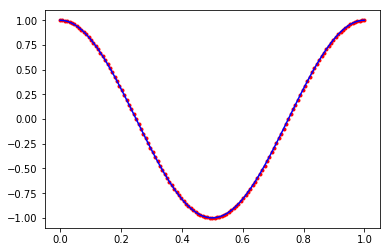

In [4]:
A = np.genfromtxt('csv/results_node_GS.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Cell centered

In [5]:
%%bash
mpicc demo_util.c hw3p2_cell.c -o bin/hw3p2_cell -lm
mpirun -n 4 bin/hw3p2_cell -p 5 --itermax 100000 --tol 1.0e-10 > csv/results_cell_GS.csv

iterations: 24491
residual: 9.99456e-11
cells: 128
error: 0.000301183


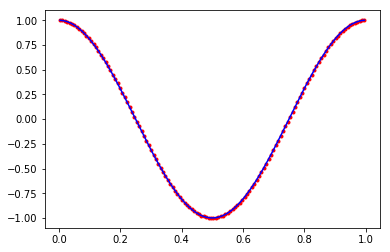

In [6]:
A = np.genfromtxt('csv/results_cell_GS.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Parts (a & b) Independence of the number of processes

The code below verifies that I get the same results regardless of the number of processes used, and that the results match the expected results provided on the homework.

In [10]:
# node centered
my_num = 3
ns = [2**i for i in range(my_num)]
ps = [7-i for i in range(my_num)]
for n,p in zip(ns,ps):
    print((n,p))
    cmd = 'mpirun -n '+ str(n) + ' bin/hw3p2_node -p ' + str(p) + ' --itermax 100000 --tol 1.0e-10'
    f = open('csv/hw3_p2_a_results_node_' + str(n) + 'proc.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

(1, 7)
(2, 6)
(4, 5)


In [13]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [2**i for i in range(my_num)]:    
    A = np.genfromtxt('csv/hw3_p2_a_results_node_' + str(n) +'proc.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0,1,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

   Processes  iterations      residual     error
1        1.0     24493.0  9.995171e-11  0.000401
2        2.0     24493.0  9.995171e-11  0.000401
4        4.0     24493.0  9.995171e-11  0.000401


In [14]:
#cell centered
my_num = 3
ns = [2**i for i in range(my_num)]
ps = [7-i for i in range(my_num)]
for n,p in zip(ns,ps):
    print((n,p))
    cmd = 'mpirun -n '+ str(n) + ' bin/hw3p2_cell -p ' + str(p) + ' --itermax 100000 --tol 1.0e-10'
    f = open('csv/hw3_p2_a_results_cell_' + str(n) + 'proc.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

(1, 7)
(2, 6)
(4, 5)


In [15]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [2**i for i in range(my_num)]:    
    A = np.genfromtxt('csv/hw3_p2_a_results_cell_' + str(n) +'proc.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

   Processes  iterations      residual     error
1        1.0     24491.0  9.994561e-11  0.000301
2        2.0     24491.0  9.994561e-11  0.000301
4        4.0     24491.0  9.994561e-11  0.000301


# Part (c)

In [18]:
# cell centered second order convergence
highest_power = 7
for p in range(5,highest_power+1):
    cmd = 'mpirun -n 4 bin/hw3p2_cell -p ' + str(p) + ' --itermax 10000000 --tol 1.0e-14'
    f = open('csv/hw3_p2_c_results_cell_N_' + str(2**p) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

         N  iterations      residual     error
32    32.0     39773.0  9.992007e-15  0.000301
64    64.0    149906.0  9.992007e-15  0.000075
128  128.0    562785.0  9.992007e-15  0.000019


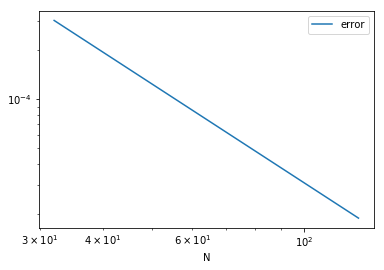

In [19]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for p in range(5,highest_power+1):    
    A = np.genfromtxt('csv/hw3_p2_c_results_cell_N_' + str(2**p) +'.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'N': (2**p), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(2**p)))
print(df)
df.plot(x='N', y='error', loglog=True)

In [20]:
# node centered second order convergence
highest_power = 7
for p in range(5,highest_power+1):
    cmd = 'mpirun -n 4 bin/hw3p2_node -p ' + str(p) + ' --itermax 10000000 --tol 1.0e-14'
    f = open('csv/hw3_p2_c_results_node_N_' + str(2**p) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

         N  iterations      residual     error
32    32.0     39780.0  9.992007e-15  0.000402
64    64.0    149903.0  9.992007e-15  0.000100
128  128.0    562771.0  9.992007e-15  0.000025


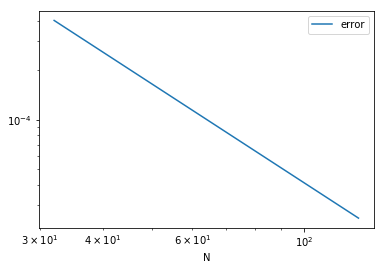

In [21]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for p in range(5,highest_power+1):    
    A = np.genfromtxt('csv/hw3_p2_c_results_node_N_' + str(2**p) +'.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    nodes = len(A)
    h = 1/(nodes-1)
    x = np.linspace(0,1,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'N': (2**p), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(2**p)))
print(df)
df.plot(x='N', y='error', loglog=True)